In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv("gdb9.sdf.csv")
df.columns  
# mu:7.3 alpha:100 homo:-0.17 lumo:0.15 cv:44 gap:0.393

Index(['mol_id', 'A', 'B', 'C', 'mu', 'alpha', 'homo', 'lumo', 'gap', 'r2',
       'zpve', 'u0', 'u298', 'h298', 'g298', 'cv', 'u0_atom', 'u298_atom',
       'h298_atom', 'g298_atom'],
      dtype='object')

In [ ]:
def return_mean_std(df): # this function define how we get one2many values for six properites
    value = df.mean() + 3 * df.std()
    return value

In [10]:
alpha_value = return_mean_std(df['gap'])
alpha_value

0.3936570348258564

In [15]:
n_samples = df.shape[0]
n_train = 100000
n_test = int(0.1 * n_samples)
n_val = n_samples - (n_train + n_test)
train, val, test = np.split(df.sample(frac=1, random_state=42), [n_train, n_val + n_train])

/blue/mingjieliu/jiruijin/program/anaconda3/envs/flowmol/lib/python3.10/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
valid_ids = np.load('valid_id.npy')  # valid_id.npy is got from running process_qm9_cond.py
valid_mol_idxs = valid_ids
n_samples = len(valid_mol_idxs)
n_train = 100000
n_test = int(0.1 * n_samples)
n_val = n_samples - (n_train + n_test)

In [6]:
np.random.seed(42)  # For reproducibility
shuffled_indices = np.random.permutation(n_samples)

In [7]:
train_idx = shuffled_indices[:n_train]
val_idx = shuffled_indices[n_train:n_train+n_val]
test_idx = shuffled_indices[n_train+n_val:]  
train_mol_idx = [valid_mol_idxs[i] for i in train_idx]
val_mol_idx = [valid_mol_idxs[i] for i in val_idx]
test_mol_idx = [valid_mol_idxs[i] for i in test_idx]

In [8]:
train_df = df.iloc[train_mol_idx]
val_df = df.iloc[val_mol_idx]
test_df = df.iloc[test_mol_idx]

In [10]:
train_df["cv"]

20917     27.234
112299    31.381
118038    38.425
28094     30.883
92790     33.467
           ...  
116027    31.338
158       18.624
20052     25.304
45996     30.210
110260    36.534
Name: cv, Length: 100000, dtype: float64

In [12]:
sampled_data = train_df["cv"].sample(n=1000, random_state=42)
sampled_data

41356     27.781
7717      24.326
82531     35.069
107912    32.276
6997      32.799
           ...  
51817     30.470
104632    36.410
89193     33.988
15395     30.519
25366     27.084
Name: cv, Length: 1000, dtype: float64

In [15]:
np.save("cv_1000_many2many.npy", sampled_data)

<Axes: xlabel='cv', ylabel='Count'>

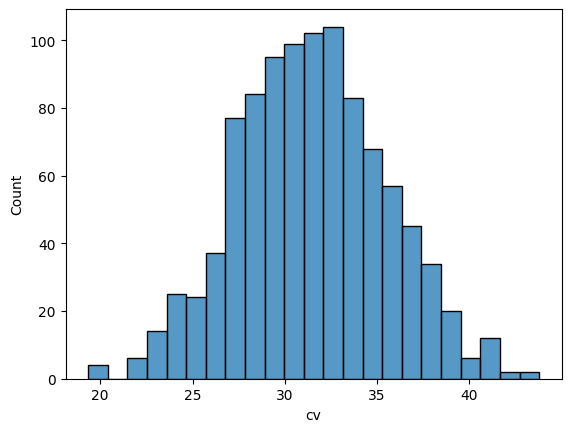

In [14]:
sns.histplot(sampled_data)

<Axes: xlabel='cv', ylabel='Count'>

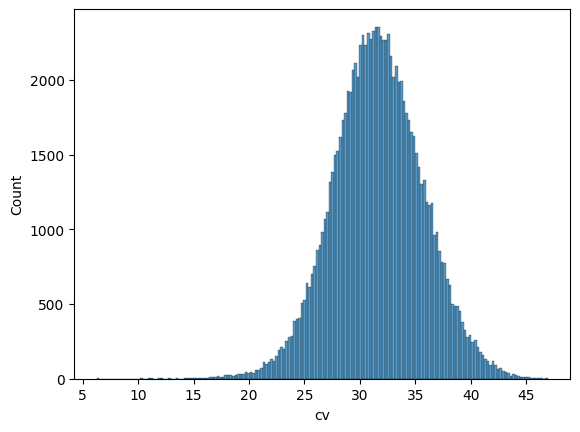

In [13]:
import seaborn as sns

sns.histplot(train_df['cv'])

In [42]:
df.iloc[valid_mol_idxs]['gap'].min()

0.0246

In [43]:
df.iloc[valid_mol_idxs]['gap'].max()

0.6221

In [12]:
filtered_df = train_df[train_df['mu'] >= 7.3]

In [14]:
507/100000

0.00507

In [15]:
55/1000

0.055

In [26]:
filtered_df.index

Index([   830,      0,  23861,    132,  23864,  23905, 133620,    104,  23887,
       133758,    183, 133564,     12, 133549,      6, 133743,   4227,     38,
        23865, 133607, 133653, 133806, 133795],
      dtype='int64')

In [51]:
len(train_df['cv'][train_df['cv']>=44])

115

In [39]:
filtered_df_2 =df.iloc[valid_mol_idxs][df.iloc[valid_mol_idxs]['gap'] >= 0.38]

In [40]:
len(filtered_df_2)

79

In [101]:
properties_tensor = torch.tensor(train_df['gap'].values, dtype=torch.float32)
properties_mean = properties_tensor.mean(dim=0)
properties_std = properties_tensor.std(dim=0)

In [103]:
(0.4-properties_mean)/properties_std

tensor(3.1376)

In [91]:
train_mol_idx[0]

20917

In [92]:
train_idx[0]

20351

In [93]:
shuffled_indices[0]

20351

In [95]:
mol_features['positions'][20351]

tensor([[-8.7200e-02,  1.5214e+00, -1.1780e-01],
        [-6.9200e-02,  3.1000e-03,  5.1300e-02],
        [-1.4059e+00, -5.7040e-01,  2.3900e-02],
        [-1.9779e+00, -1.1046e+00,  1.0835e+00],
        [-3.1763e+00, -1.4916e+00,  7.0870e-01],
        [-3.2762e+00, -1.1570e+00, -6.0300e-01],
        [-4.4203e+00, -1.3552e+00, -1.3395e+00],
        [-2.1748e+00, -5.7410e-01, -1.0719e+00],
        [ 9.3690e-01,  1.9052e+00, -1.0380e-01],
        [-5.4960e-01,  1.7964e+00, -1.0685e+00],
        [-6.4670e-01,  1.9954e+00,  6.9320e-01],
        [ 5.1140e-01, -4.7120e-01, -7.4540e-01],
        [ 3.5380e-01, -2.9120e-01,  1.0135e+00],
        [-5.0106e+00, -2.0853e+00, -9.6930e-01],
        [-4.2674e+00, -1.4318e+00, -2.3339e+00]], dtype=torch.float64)

In [2]:
valid_ids = np.load("valid_id.npy")
valid_ids

array([     0,      1,      2, ..., 133882, 133883, 133884])

In [3]:
valid_df = df.iloc[valid_ids]

In [9]:
len(valid_df['gap'][valid_df['gap']>=0.4])

26

In [10]:
len(valid_df['gap'][valid_df['gap']>=0.4])

26

In [11]:
valid_df['gap']

0         0.5048
1         0.3399
2         0.3615
3         0.3351
4         0.3796
           ...  
133878    0.3206
133879    0.3331
133882    0.2953
133883    0.3003
133884    0.3058
Name: gap, Length: 129428, dtype: float64

In [12]:
valid_df['gap'][valid_df['gap']>=0.4]

0         0.5048
6         0.4426
12        0.4179
20        0.4010
38        0.4107
104       0.4056
132       0.4030
183       0.6221
830       0.4465
4227      0.4306
4232      0.4298
23861     0.4117
23864     0.4180
23865     0.4802
23887     0.4177
23905     0.4170
133549    0.4109
133564    0.4150
133607    0.4037
133620    0.4620
133653    0.4063
133660    0.4015
133743    0.4051
133758    0.4128
133795    0.4088
133806    0.4074
Name: gap, dtype: float64

In [14]:
if 283 in train_df['gap'].index:
    print('yes')
else: print('no')

yes


In [16]:
train_df['gap'][train_df['gap']>=0.4]

830       0.4465
0         0.5048
23861     0.4117
132       0.4030
23864     0.4180
23905     0.4170
133620    0.4620
104       0.4056
23887     0.4177
133758    0.4128
183       0.6221
133564    0.4150
12        0.4179
133549    0.4109
6         0.4426
133743    0.4051
4227      0.4306
38        0.4107
23865     0.4802
133607    0.4037
133653    0.4063
133806    0.4074
133795    0.4088
Name: gap, dtype: float64

In [25]:
train_df['gap'].loc[0]

0.5048

0         0.5048
1         0.3399
2         0.3615
3         0.3351
4         0.3796
           ...  
133880    0.2842
133881    0.3002
133882    0.2953
133883    0.3003
133884    0.3058
Name: gap, Length: 133885, dtype: float64